In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Reset the pseudo random number generator to the same value.
seed = 42
np.random.seed(seed)

In [3]:
# Sets the number of examples.
N = 1000

# Features.
x1 = 20*np.random.rand(N, 1)
x2 = np.random.rand(N, 1)

# Create target function.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Noisy function.
y_noisy = y + w

In [4]:
# Generate values for parameters.
M = 200
a1 = np.linspace(-12.0, 14.0, M)
a2 = np.linspace(-12.0, 14.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
        J[iter1, iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

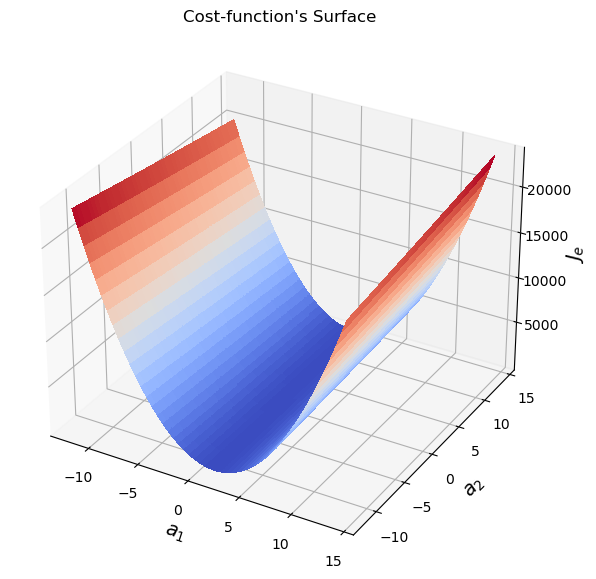

In [5]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_bgd.png", dpi=600)
#Show the plot.
plt.show()

In [6]:
# Concatenate both column vectors.
X = np.c_[x1, x2]

In [7]:
# Min-Max Scaler.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])

print(np.mean(X[:,0]))
print(np.mean(X[:,1]))

print(np.max(X[:,0]))
print(np.min(X[:,0]))

print(np.max(X[:,1]))
print(np.min(X[:,1]))

-6.217248937900877e-18
3.375077994860476e-17
0.5119771547523182
-0.4880228452476818
0.4942769158179735
-0.5057230841820265


In [8]:
# Generate values for parameters.
M = 200
a1 = np.linspace(0.0, 40.0, M)
a2 = np.linspace(-19.0, 21.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1, iter2]*X[:,0].reshape(N, 1) + A2[iter1, iter2]*X[:,1].reshape(N, 1)
        J[iter1, iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

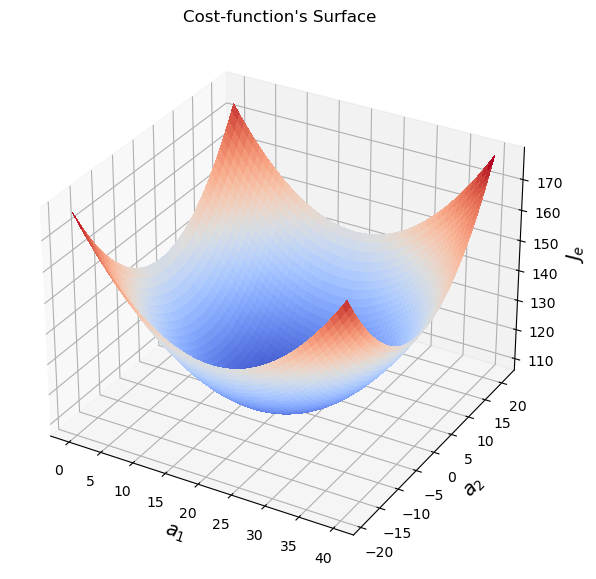

In [9]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_bgd.png", dpi=600)
#Show the plot.
plt.show()

In [10]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
yhat = X.dot(a_opt)
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

print('a0:', a_opt[0,0])
print('a1:', a_opt[1,0])
print('Joptimum:', Joptimum)

a0: 19.868164851047304
a1: 0.9931282275358361
Joptimum: 107.56291897833978


In [11]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.8

# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.array([-10.0, -10.0]).reshape(2, 1)

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[:, 0] = a.reshape(2,)

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))
#while iteration < n_iterations and error > 0.001:
while iteration < n_iterations:
    # Weight update.
    gradients = -(2.0/N)*X.T.dot(y_noisy - X.dot(a))
    a = a - alpha * gradients
    # Calculate error.
    Jgd[iteration+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))
    # Error between iterations.
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    # Store weight and gradient history.
    a_hist[:, iteration+1] = a.reshape(2,)
    grad_hist[:, iteration] = gradients.reshape(2,)
    # Increment counter.
    iteration += 1

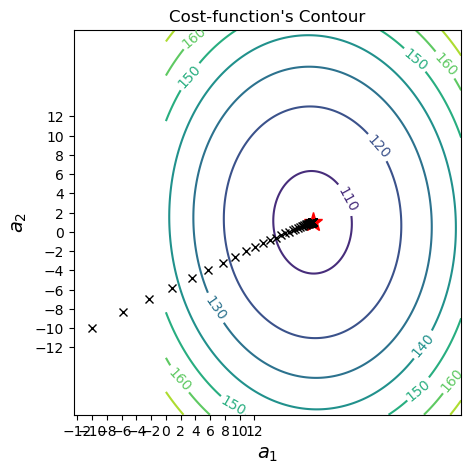

In [12]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
#plt.savefig("error_contour_bgd.png", dpi=600)
plt.show()

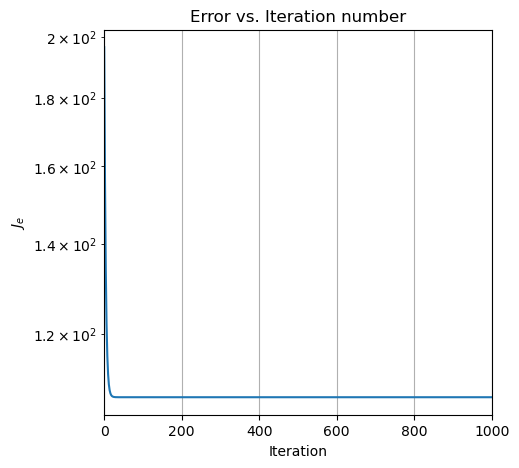

In [13]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.grid()
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

In [14]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

a1_opt: 19.868164851047304
a2_opt: 0.9931282275358361
a1_gd: 19.868164851047304
a2_gd: 0.9931282275358383


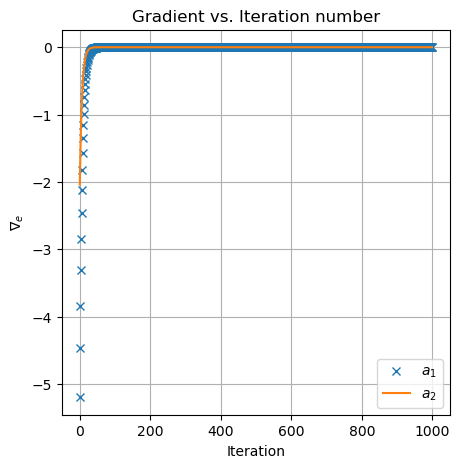

In [15]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration), grad_hist[1,:], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.grid()
plt.show()